In [10]:
import pandas as pd
import datetime as dt
dt.datetime.strptime

<function datetime.strptime>

In [11]:
df = pd.read_csv('TSA_checkpoint_08_21_22.csv',decimal=',')

In [12]:
df = df.apply(lambda x: x.str.replace(',','')).fillna(0)
df.head()

,Date,2022,2021,2020,2019
0,8/20/22,2001650,1685462,625822,2039233
1,8/19/22,2301271,1990608,764468,2559244
2,8/18/22,2320885,1945026,772380,2533184
3,8/17/22,2044346,1678231,586718,2306838
4,8/16/22,1992395,1607238,565946,2247446


In [13]:
df['2022'] = pd.to_numeric(df['2022'])
df['2021'] = pd.to_numeric(df['2021'])
df['2020'] = pd.to_numeric(df['2020'])
df['2019'] = pd.to_numeric(df['2019'])

In [14]:
df.columns
df.dtypes

Date    object
2022     int64
2021     int64
2020     int64
2019     int64
dtype: object

In [15]:
df['2022 v 2019'] = df['2022']/(df['2019']) * 100
df['2021 v 2019'] = df['2021']/df['2019'] * 100
df['2020 v 2019'] = df['2020']/df['2019'] * 100
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df.tail()

,Date,2022,2021,2020,2019,2022 v 2019,2021 v 2019,2020 v 2019
359,2021-08-26,0,1826310,721060,2561109,0.0,71.309343,28.154210
360,2021-08-25,0,1539707,540043,2188688,0.0,70.348401,24.674280
361,2021-08-24,0,1468219,523186,2015088,0.0,72.861284,25.963432
362,2021-08-23,0,1820355,726788,2358007,0.0,77.198880,30.822131
363,2021-08-22,0,1965020,841806,2493162,0.0,78.816379,33.764593


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df.dtypes

Date           datetime64[ns]
2022                    int64
2021                    int64
2020                    int64
2019                    int64
2022 v 2019           float64
2021 v 2019           float64
2020 v 2019           float64
dtype: object

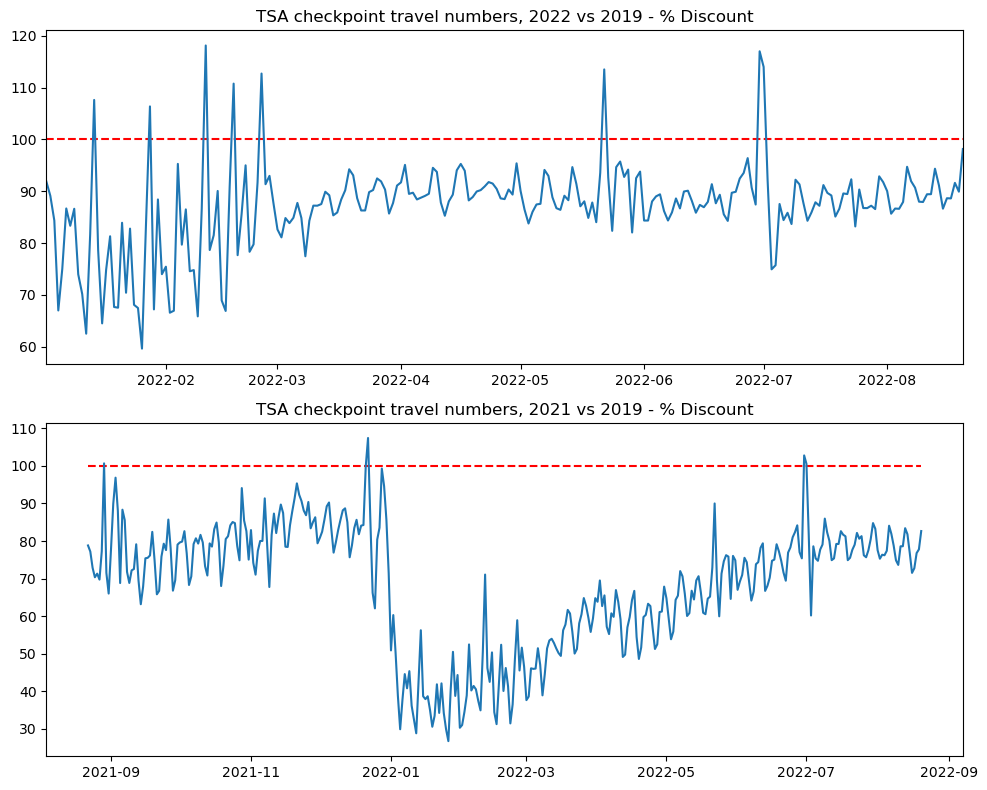

In [18]:

#plot 2022
df_2022 = df.loc[(df['Date'] > datetime.strptime('2022-01-01', '%Y-%m-%d'))]
x = df_2022['Date']
y = df_2022['2022 v 2019']
fig, ax = plt.subplots(2, 2, figsize=(10,8))

left = dt.date(2022, 1, 2)
right = dt.date(2022, 8, 20)

plt.subplot(2, 1, 1)

plt.title('TSA checkpoint travel numbers, 2022 vs 2019 - % Discount')
#plt.axhline(y=100, xmin='2022-01-02', xmax='2020-09-17', color='purple', label='test')
plt.hlines(y=100, xmin=left,xmax=right, linestyles='dashed', colors='red')

#plt.set_xlim([datetime.date(2022, 1, 2), datetime.date(2022, 8, 20)])
plt.plot(x,y)
plt.gca().set_xbound(left, right)

#plot 2:
x = df['Date']
y = df['2021 v 2019']

left = dt.date(2021, 8, 22)
right = dt.date(2022, 8, 20)

plt.subplot(2, 1, 2)
plt.title('TSA checkpoint travel numbers, 2021 vs 2019 - % Discount')
plt.hlines(y=100, xmin=left,xmax=right, linestyles='dashed', colors='red')

plt.plot(x,y)

fig.tight_layout()
plt.show()

In [19]:
x_max = df_2022['Date'].max()
